2.979253986666667
0.23416030101313948


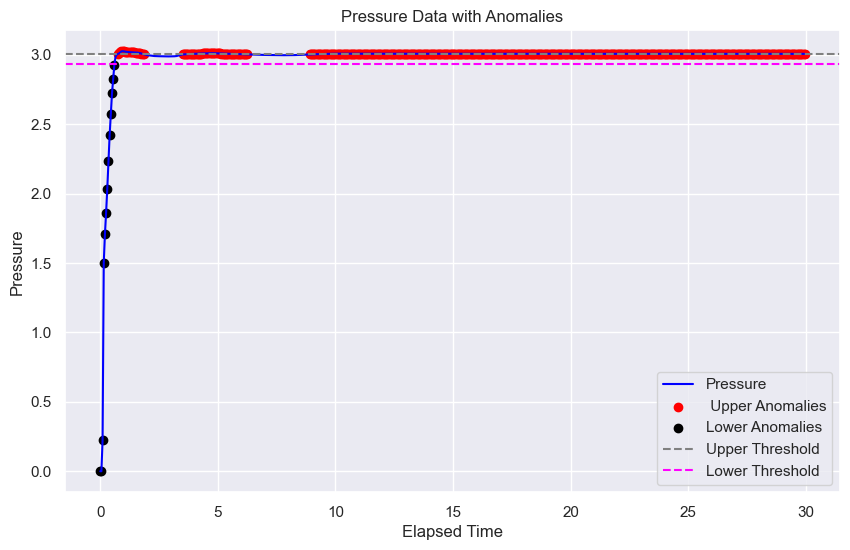

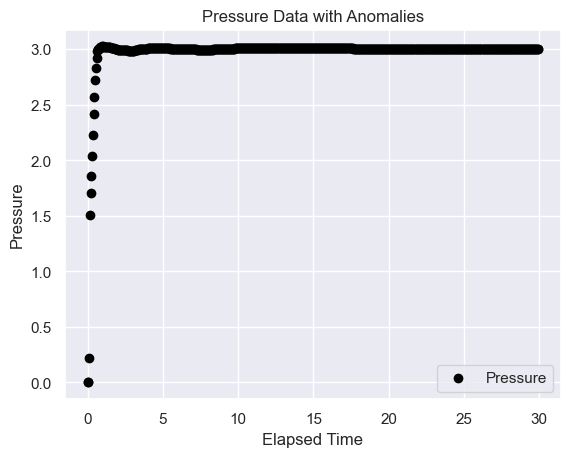

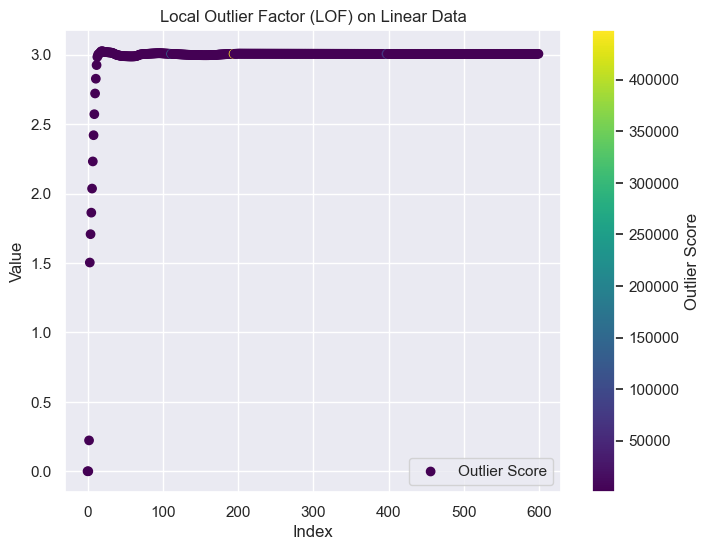

In [60]:
# # Importing necessary libraries
# import pandas as pd
# from sklearn.ensemble import IsolationForest
# import csv 

# # Load data
# Data = []

# with open ('major .txt') as f:
#     reader_obj = csv.reader(f) 
      
#     # Iterate over each row in the csv  
#     # file using reader object 
#     for row in reader_obj:

#     # Load data into DataFrame
#         Data.append(row)

# csd = []
# for l in Data:
#     if len(l) == 6:
#         # csd.append([l[2],l[3],l[5]])
#         if l[2] == "PRF" or l[2] == "FGN" or l[2] == "SDP" or l[2] == "DPD":
#             csd.append([l[2],float(l[3].split()[1]),float(l[5].split()[1])])
        

# # for d in range(1000):
# #     print(csd[d])

# Prf = []
# Flg = []
# Stb = []
# Dpd = []

# empty = []

# i = 0
# for d in csd:
#     if d == ['PRF', 0.0, 0.0]:
#         empty.append(i)
#     i += 1
# f = empty[0]
# sec = empty[1]

# csd = csd[f:sec]

# # print(csd)
# data = []
# for d in csd:
#     data.append([d[1],d[2]])


# columns = ['Elapse_Time', 'Pressure']
# Pdf = pd.DataFrame(data, columns=columns)
# print(Pdf)


# # # Preprocessing (if needed)
# # # For example, converting time and pressure columns to numeric format
# # data['Elapsed_Time'] = pd.to_numeric(data['Elapsed_Time'])
# # data['Pressure'] = pd.to_numeric(data['Pressure'])

# # # Feature engineering (if needed)
# # # For anomaly detection, you may not need additional feature engineering if pressure alone is sufficient

# # # Training the Isolation Forest model
# model = IsolationForest(random_state=42)
# model.fit(Pdf['Elapsed_Time', 'Pressure'])

# # # Predicting anomalies
# anomaly_scores = model.decision_function(Pdf)
# Pdf['Anomaly_Score'] = anomaly_scores
# Pdf['Is_Anomaly'] = model.predict(Pdf['Elapsed_Time', 'Pressure'])

# # # Visualizing anomalies (optional)
# # # You can visualize the anomalies detected to identify potential leaks

import pandas as pd
import matplotlib.pyplot as plt
import csv

# Load data
# data = pd.read_csv("your_data.csv")  # Replace "your_data.csv" with your actual data file
Data = []

with open ('minor3.txt') as f:
    reader_obj = csv.reader(f) 
      
    # Iterate over each row in the csv  
    # file using reader object 
    for row in reader_obj:

    # Load data into DataFrame
        Data.append(row)

csd = []
for l in Data:
    if len(l) == 6:
        # csd.append([l[2],l[3],l[5]])
        if l[2] == "PRF" or l[2] == "FGN" or l[2] == "SDP":
            csd.append([l[2],float(l[3].split()[1]),float(l[5].split()[1])])
        

# for d in range(1000):
#     print(csd[d])
            
Prf = []
Flg = []
Stb = []
Dpd = []

empty = []

i = 0
for d in csd:
    if d == ['PRF', 0.0, 0.0]:
        empty.append(i)
    i += 1
f = empty[0]
sec = empty[1]

csd = csd[f:sec]

# print(csd)
D = []
den = []
for d in csd:
    D.append([d[1],d[2]])
    den.append(d[2])


columns = ['Elapse_Time', 'Pressure']
data = pd.DataFrame(D, columns=columns)
# print(data)
            


# Calculate summary statistics for pressure
mean_pressure = data['Pressure'].mean()
std_pressure = data['Pressure'].std()
print(mean_pressure)
print(std_pressure)

# Define thresholds
threshold_upper = mean_pressure + .1 * std_pressure  # Example threshold: 2 standard deviations above the mean
threshold_lower = mean_pressure - .2 * std_pressure  # Example threshold: 2 standard deviations below the mean

# Plot pressure values over time
plt.figure(figsize=(10, 6))
plt.plot(data['Elapse_Time'], data['Pressure'], color='blue', label='Pressure')

# Highlight anomalies
anomalies1 = data[(data['Pressure'] > threshold_upper)]
anomalies2 = data[(data['Pressure'] < threshold_lower)]
plt.scatter(anomalies1['Elapse_Time'], anomalies1['Pressure'], color='red', label=' Upper Anomalies')
plt.scatter(anomalies2['Elapse_Time'], anomalies2['Pressure'], color='black', label='Lower Anomalies')

# Plot thresholds
plt.axhline(y=threshold_upper, color='gray', linestyle='--', label='Upper Threshold')
plt.axhline(y=threshold_lower, color='magenta', linestyle='--', label='Lower Threshold')

plt.xlabel('Elapsed Time')
plt.ylabel('Pressure')
plt.title('Pressure Data with Anomalies')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(data['Elapse_Time'], data['Pressure'],color = 'black', label = 'Pressure')

plt.xlabel('Elapsed Time')
plt.ylabel('Pressure')
plt.title('Pressure Data with Anomalies')
plt.legend()
plt.grid(True)
plt.show()


# import seaborn as sns
# sns.set()
# import numpy as np

# fig, ax = plt.subplots(figsize=(10,4))

# sns.kdeplot(ax=ax, data=data, 
#             bw_adjust=0.3,
#             linewidth=2.5, fill=True)

# # plot datapoints
# ax.plot(data, np.zeros_like(data) + 0.05, 's', 
#         markersize=8, color='black')
# for i, xi in enumerate(data):
#     plt.annotate(r'$x_{}$'.format(i+1),
#                  xy=[xi, 0.1],
#                  horizontalalignment='center',
#                  fontsize=18,
#                 )
# plt.show()

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde

# # Generate linear data (replace this with your actual data)
# np.random.seed(0)
# # linear_data = np.random.normal(loc=0, scale=1, size=1000)

# # Estimate the probability density function (PDF) using KDE
# kde = gaussian_kde(data['Pressure'])

# # Generate points for plotting the KDE curve
# x_values = np.linspace(min(data['Pressure']), max(data['Pressure']), 1000)
# kde_values = kde(x_values)

# # Plot the linear data and the KDE curve
# plt.figure(figsize=(8, 6))
# plt.hist(data['Pressure'], bins=30, density=True, alpha=0.5, color='blue', label='Linear Data')
# plt.plot(x_values, kde_values, color='red', label='KDE')
# plt.title('Kernel Density Estimation (KDE) on Linear Data')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.legend()
# plt.grid(True)
# plt.show()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate linear data (replace this with your actual data)
np.random.seed(0)
linear_data = np.array(den).reshape(-1, 1)

# Fit the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=2)  # Adjust n_neighbors as needed
lof.fit(linear_data)

# Predict outlier scores
outlier_scores = lof.negative_outlier_factor_

# Plot the linear data and highlight outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(linear_data)), linear_data, c=-outlier_scores, cmap='viridis', label='Outlier Score')
plt.colorbar(label='Outlier Score')
plt.title('Local Outlier Factor (LOF) on Linear Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


